In [1]:
import urllib.request
import boto3
import time
import requests
import pandas as pd
import numpy as np

### Stock list

In [97]:
nasdaq = pd.read_csv('NASDAQ.csv')
nasdaq = nasdaq[["Symbol", "Description"]].rename(columns={"Symbol":"symbol", "Description":"company"}) \
                                          .reset_index(drop=True)
nasdaq
# nyse = pd.read_csv('NYSE.csv')
# stock = pd.concat([nasdaq, nyse])[["Symbol", "Description"]] \
#           .rename(columns={"Symbol":"symbol", "Description":"company"}) \
#           .reset_index(drop=True)
# stock

,symbol,company
0,AACG,Ata Creativity Global
1,AAL,American Airlines Gp
2,AAME,Atlantic Amer Cp
3,AAOI,Applied Optoelect
4,AAON,Aaon Inc
...,...,...
3556,ZSAN,Zosano Pharma
3557,ZUMZ,Zumiez Inc
3558,ZVO,Zovio Inc
3559,ZYNE,Zynerba Pharma CS


In [7]:
symb_list = stock.symbol.tolist()
symb_list[:5]

['AACG', 'AAL', 'AAME', 'AAOI', 'AAON']

In [20]:
symb_nasdaq = nasdaq.symbol.tolist()
symb_nasdaq[:5]

['AACG', 'AAL', 'AAME', 'AAOI', 'AAON']

### Get sector performance

In [111]:
def get_sector():
    
    performance = requests.get(f"https://financialmodelingprep.com/api/v3/stock/sectors-performance").json()
    
    return performance

In [131]:
perf = get_sector()["sectorPerformance"]
perf

[{'sector': 'Basic Materials', 'changesPercentage': '-1.0546%'},
 {'sector': 'Communication Services', 'changesPercentage': '-0.2833%'},
 {'sector': 'Conglomerates', 'changesPercentage': '15.4494%'},
 {'sector': 'Consumer Cyclical', 'changesPercentage': '-0.8187%'},
 {'sector': 'Consumer Defensive', 'changesPercentage': '-0.4777%'},
 {'sector': 'Energy', 'changesPercentage': '-2.9692%'},
 {'sector': 'Financial', 'changesPercentage': '-0.3666%'},
 {'sector': 'Financial Services', 'changesPercentage': '-0.8011%'},
 {'sector': 'Healthcare', 'changesPercentage': '-0.2245%'},
 {'sector': 'Industrial Goods', 'changesPercentage': '-0.4700%'},
 {'sector': 'Industrials', 'changesPercentage': '-1.4798%'},
 {'sector': 'Real Estate', 'changesPercentage': '-1.0622%'},
 {'sector': 'Services', 'changesPercentage': '0.0000%'},
 {'sector': 'Technology', 'changesPercentage': '0.4418%'},
 {'sector': 'Utilities', 'changesPercentage': '-1.8399%'}]

In [132]:
dict_sector = {}
dict_sector["sector"] = [d["sector"] for d in perf]
dict_sector["change"] = [d["changesPercentage"] for d in perf]
df_sector = pd.DataFrame(dict_sector)
df_sector

,sector,change
0,Basic Materials,-1.0546%
1,Communication Services,-0.2833%
2,Conglomerates,15.4494%
3,Consumer Cyclical,-0.8187%
4,Consumer Defensive,-0.4777%
5,Energy,-2.9692%
6,Financial,-0.3666%
7,Financial Services,-0.8011%
8,Healthcare,-0.2245%
9,Industrial Goods,-0.4700%


In [133]:
df_sector["change"] = df_sector["change"].apply(lambda x: float(x.strip("%")))
df_sector = df_sector.sort_values(by="change", ascending=False).reset_index(drop=True)
df_sector

,sector,change
0,Conglomerates,15.4494
1,Technology,0.4418
2,Services,0.0000
3,Healthcare,-0.2245
4,Communication Services,-0.2833
5,Financial,-0.3666
6,Industrial Goods,-0.4700
7,Consumer Defensive,-0.4777
8,Financial Services,-0.8011
9,Consumer Cyclical,-0.8187


In [130]:
df_sector.sector.tolist()

['Healthcare',
 'Technology',
 'Utilities',
 'Industrial Goods',
 'Energy',
 'Communication Services',
 'Financial',
 'Real Estate',
 'Basic Materials',
 'Conglomerates',
 'Services',
 'Consumer Defensive',
 'Financial Services',
 'Industrials',
 'Consumer Cyclical']

In [2]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

/Users/lmeng/Documents/USF_MSDS/spring_module2_prod_analytics/ProductAnalytics/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
tmp = yf.download("AAPL", period="5d")
tmp

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-01,286.250000,299.000000,285.850006,289.070007,289.070007,60154200
2020-05-04,289.170013,293.690002,286.320007,293.160004,293.160004,33392000
2020-05-05,295.059998,301.000000,294.459991,297.559998,297.559998,36937800
2020-05-06,300.459991,303.239990,298.869995,300.630005,300.630005,35583400
2020-05-07,303.220001,305.170013,301.970001,303.739990,303.739990,28690300


In [21]:
ohlc_data = pdr.get_data_yahoo(symb_nasdaq, start="2019-05-01", end="2020-04-30", rounding=True)

[*********************100%***********************]  3561 of 3561 completed

158 Failed downloads:
- FSRVW: No data found for this date range, symbol may be delisted
- CIICW: No data found for this date range, symbol may be delisted
- BLNKW: No data found for this date range, symbol may be delisted
- AMRHW: No data found for this date range, symbol may be delisted
- IMVTW: No data found for this date range, symbol may be delisted
- PAVMZ: No data found for this date range, symbol may be delisted
- SMMCW: No data found for this date range, symbol may be delisted
- ALACR: No data found for this date range, symbol may be delisted
- OFSSL: No data found for this date range, symbol may be delisted
- THWWW: No data found for this date range, symbol may be delisted
- TZACW: No data found for this date range, symbol may be delisted
- SGLBW: No data found for this date range, symbol may be delisted
- TOTAR: No data found for this date range, symbol may be delisted
- ALACW: No data found for this

Adj Close                                                          \
                AACG    AAL  AAME   AAOI   AAON    AAPL   AAWW   AAXJ   AAXN   
Date                                                                           
2019-05-01      1.76  33.46  2.46  12.27  49.54  207.80  47.59  70.63  63.79   
2019-05-02      1.69  33.50  2.52  12.09  49.19  206.45  45.91  70.78  64.26   
2019-05-03      1.81  34.33  2.52  12.60  51.46  209.01  46.85  71.62  65.30   
2019-05-06      1.84  34.29  2.47  12.69  49.02  205.79  44.95  69.97  65.84   
2019-05-07      2.26  33.56  2.35  12.08  47.06  200.24  43.66  68.56  64.64   

                   ...     Volume                                              \
             ABCB  ...       ZLAB         ZM        ZN        ZNGA         ZS   
Date               ...                                                          
2019-05-01  35.52  ...   147900.0  3301900.0  517200.0  37618400.0  1551700.0   
2019-05-02  36.14  ...   514400.0  2525300.0  376000.0  77694900.0  1741700.0   
2019-05-03  36.96  ...  1667700.0  2590300.0  261100.0  33778900.0  1147500.0   
2019-05-06  36.77  ...   271200.0  2051800.0  280000.0  18505700.0  2097300.0   
2019-05-07  36.03  ...   274400.0  1975200.0  292400.0  18414500.0  2758000.0   

                                                               
                ZSAN      ZUMZ       ZVO       ZYNE      ZYXI  
Date                                                           
2019-05-01  245300.0  486300.0  153600.0  4308000.0  349600.0  
2019-05-02  206200.0  264500.0  128700.0  4285000.0  318700.0  
2019-05-03  341900.0  207600.0  259900.0  2375500.0  483200.0  
2019-05-06  366600.0  229300.0  218400.0  4140100.0  165400.0  
2019-05-07  425400.0  258700.0  139500.0  3749500.0  198300.0  

[5 rows x 21366 columns]

In [22]:
ohlc_data.head()

Adj Close                                                          \
                AACG    AAL  AAME   AAOI   AAON    AAPL   AAWW   AAXJ   AAXN   
Date                                                                           
2019-05-01      1.76  33.46  2.46  12.27  49.54  207.80  47.59  70.63  63.79   
2019-05-02      1.69  33.50  2.52  12.09  49.19  206.45  45.91  70.78  64.26   
2019-05-03      1.81  34.33  2.52  12.60  51.46  209.01  46.85  71.62  65.30   
2019-05-06      1.84  34.29  2.47  12.69  49.02  205.79  44.95  69.97  65.84   
2019-05-07      2.26  33.56  2.35  12.08  47.06  200.24  43.66  68.56  64.64   

                   ...     Volume                                              \
             ABCB  ...       ZLAB         ZM        ZN        ZNGA         ZS   
Date               ...                                                          
2019-05-01  35.52  ...   147900.0  3301900.0  517200.0  37618400.0  1551700.0   
2019-05-02  36.14  ...   514400.0  2525300.0  376000.0  77694900.0  1741700.0   
2019-05-03  36.96  ...  1667700.0  2590300.0  261100.0  33778900.0  1147500.0   
2019-05-06  36.77  ...   271200.0  2051800.0  280000.0  18505700.0  2097300.0   
2019-05-07  36.03  ...   274400.0  1975200.0  292400.0  18414500.0  2758000.0   

                                                               
                ZSAN      ZUMZ       ZVO       ZYNE      ZYXI  
Date                                                           
2019-05-01  245300.0  486300.0  153600.0  4308000.0  349600.0  
2019-05-02  206200.0  264500.0  128700.0  4285000.0  318700.0  
2019-05-03  341900.0  207600.0  259900.0  2375500.0  483200.0  
2019-05-06  366600.0  229300.0  218400.0  4140100.0  165400.0  
2019-05-07  425400.0  258700.0  139500.0  3749500.0  198300.0  

[5 rows x 21366 columns]

In [45]:
df_volume = ohlc_data["Volume"]
df_volume.to_csv('nasdaq_volume_v1.csv', index=False)
print(df_volume.shape)

(253, 3561)


In [4]:
# df_close = ohlc_data["Adj Close"]
# df_close.to_csv('nasdaq_close_v1.csv', index=False)  # date
df_close = pd.read_csv('nasdaq_close_v1.csv')
print(df_close.shape)
df_close.head()

(253, 3561)


,AACG,AAL,AAME,AAOI,AAON,AAPL,AAWW,AAXJ,AAXN,ABCB,...,ZLAB,ZM,ZN,ZNGA,ZS,ZSAN,ZUMZ,ZVO,ZYNE,ZYXI
0,1.76,33.46,2.46,12.27,49.54,207.80,47.59,70.63,63.79,35.52,...,26.05,72.76,0.56,5.51,66.17,3.76,25.45,6.24,11.91,5.99
1,1.69,33.50,2.52,12.09,49.19,206.45,45.91,70.78,64.26,36.14,...,25.73,75.50,0.53,5.82,65.67,3.69,25.79,5.99,11.10,6.68
2,1.81,34.33,2.52,12.60,51.46,209.01,46.85,71.62,65.30,36.96,...,26.37,79.18,0.56,6.03,67.40,3.64,26.94,5.97,11.45,6.90
3,1.84,34.29,2.47,12.69,49.02,205.79,44.95,69.97,65.84,36.77,...,27.83,78.24,0.57,6.17,69.50,3.55,26.53,6.27,12.76,6.78
4,2.26,33.56,2.35,12.08,47.06,200.24,43.66,68.56,64.64,36.03,...,27.05,73.33,0.56,6.09,66.36,3.49,26.12,6.09,12.77,7.10


In [5]:
returns = df_close.pct_change().mean() * 252
volatility = df_close.pct_change().std() * np.sqrt(252)


In [6]:
df = pd.DataFrame([returns, volatility]).T
df.columns = ["returns", "volatility"]
df.head()

,returns,volatility
AACG,-0.537474,0.850472
AAL,-0.681157,0.768540
AAME,0.007998,0.841552
AAOI,0.138011,0.707721
AAON,0.109503,0.517549


In [10]:
df.isnull().sum()

returns       158
volatility    158
dtype: int64

In [11]:
df = df.dropna()

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

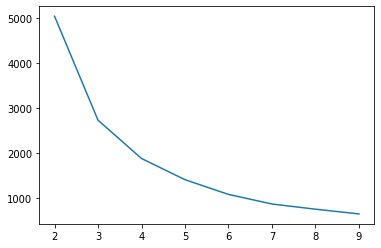

In [12]:
error = []
for k in range(2, 10):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)
    error.append(k_means.inertia_)

fig = plt.figure()
plt.plot(range(2, 10), error)
plt.show()

In [20]:
kmeans = KMeans(n_clusters=5).fit(df)
cluster = kmeans.labels_

In [25]:
result = df.copy()
result["cluster"] = cluster
result.head()

,returns,volatility,cluster
AACG,-0.537474,0.850472,3
AAL,-0.681157,0.768540,3
AAME,0.007998,0.841552,0
AAOI,0.138011,0.707721,0
AAON,0.109503,0.517549,0


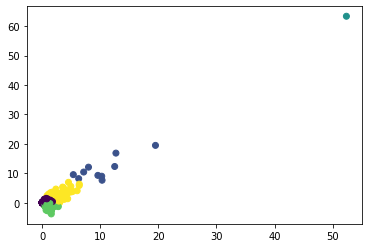

In [27]:
plt.scatter(x="volatility", y="returns", data=result, c="cluster")

In [34]:
np.argmax(df.returns)

1906

In [35]:
df.iloc[1906]

returns       63.398834
volatility    52.367446
Name: MCBS, dtype: float64

In [36]:
df = df.drop(index="MCBS")

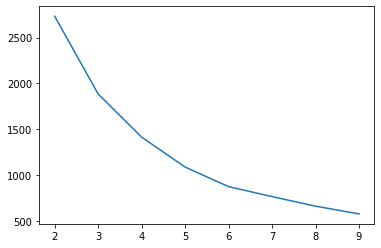

In [45]:
error = []
for k in range(2, 10):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)
    error.append(k_means.inertia_)

fig = plt.figure()
plt.plot(range(2, 10), error)
plt.show()

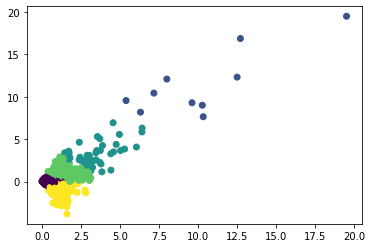

In [80]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
cluster = kmeans.labels_
result = df.copy()
result["cluster"] = cluster
plt.scatter(x="volatility", y="returns", data=result, c="cluster")

In [ ]:
# 0: purple, 1:blue, 2:dark green, 3: green, 4: yellow

In [82]:
profile = {0: "Conservative", 1:"Aggressive", 2:"Momentum", 3:"Moderate", 4:"Reversal"}
result["profile"] = result["cluster"].map(profile)

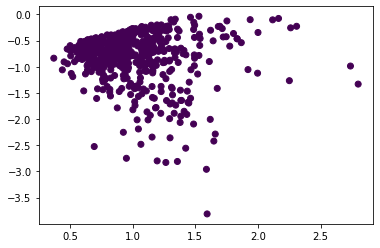

In [81]:
plt.scatter(x="volatility", y="returns", data=result.loc[result.cluster==4], c="cluster")

In [99]:
# result.reset_index(inplace=True)
# result.rename(columns={"index":"symbol"}, inplace=True)
df_info = pd.merge(result, nasdaq, how="left", on="symbol")

In [101]:
df_info.to_csv('nasdaq_cluster_v1.csv', index=False)


In [12]:
df_info = pd.read_csv("nasdaq_cluster_v1.csv")
df_info

,symbol,returns,volatility,cluster,profile,company
0,AACG,-0.537474,0.850472,4,Reversal,Ata Creativity Global
1,AAL,-0.681157,0.768540,4,Reversal,American Airlines Gp
2,AAME,0.007998,0.841552,0,Conservative,Atlantic Amer Cp
3,AAOI,0.138011,0.707721,0,Conservative,Applied Optoelect
4,AAON,0.109503,0.517549,0,Conservative,Aaon Inc
...,...,...,...,...,...,...
3397,ZSAN,-0.968021,1.101436,4,Reversal,Zosano Pharma
3398,ZUMZ,0.075721,0.629056,0,Conservative,Zumiez Inc
3399,ZVO,-0.282725,1.358324,4,Reversal,Zovio Inc
3400,ZYNE,-0.769220,0.800582,4,Reversal,Zynerba Pharma CS


In [14]:
pool = df_info.loc[df_info.cluster == 2]
pool.sort_values(by="returns", ascending=False)#.iloc[0][["symbol", "company"]]

,symbol,returns,volatility,cluster,profile,company
2961,TBLTW,6.934835,4.551221,2,Momentum,Toughbuilt Industries Inc WT
2119,NLNK,6.306912,6.409242,2,Momentum,Newlink Genetics Cor
1867,LTRPB,5.848532,6.399863,2,Momentum,Liberty Tripadv B
1748,KRTX,5.559383,4.954869,2,Momentum,Karuna Therapeutics Inc
1928,MEDS,5.306022,3.547224,2,Momentum,Trxade Group Inc
91,AHPI,5.060349,3.700035,2,Momentum,Allied Healthcare
692,CODX,4.638367,2.383699,2,Momentum,Co-Diagnostics Inc
386,BLPH,4.386372,4.748539,2,Momentum,Bellerophon Ther Com
1447,HJLIW,4.255587,3.872206,2,Momentum,Hancock Jaffe Laboratories Inc WT
1350,GPOR,4.071370,6.046084,2,Momentum,Gulfport Energy Corp


In [6]:
df_info["returns"] = df_info["returns"].apply(lambda x: f"{np.round(100*x, 1)}%")

In [7]:
df_info

,symbol,returns,volatility,cluster,profile,company
0,AACG,-53.7%,0.850472,4,Reversal,Ata Creativity Global
1,AAL,-68.1%,0.768540,4,Reversal,American Airlines Gp
2,AAME,0.8%,0.841552,0,Conservative,Atlantic Amer Cp
3,AAOI,13.8%,0.707721,0,Conservative,Applied Optoelect
4,AAON,11.0%,0.517549,0,Conservative,Aaon Inc
...,...,...,...,...,...,...
3397,ZSAN,-96.8%,1.101436,4,Reversal,Zosano Pharma
3398,ZUMZ,7.6%,0.629056,0,Conservative,Zumiez Inc
3399,ZVO,-28.3%,1.358324,4,Reversal,Zovio Inc
3400,ZYNE,-76.9%,0.800582,4,Reversal,Zynerba Pharma CS


In [8]:
moment = df_info.loc[df_info.cluster == 2]
pool = moment.sample(5)
pool

,symbol,returns,volatility,cluster,profile,company
973,ELTK,340.1%,3.447112,2,Momentum,Eltek Ltd
902,DTSS,222.1%,3.024099,2,Momentum,Datasea Inc
1721,KERN,197.8%,2.753782,2,Momentum,Akerna Corp Cl A
505,CAPR,287.3%,2.984910,2,Momentum,Capricor Therap
403,BNTX,358.4%,1.708748,2,Momentum,Biontech Se ADR


In [19]:
import plotly.graph_objects as go

from plotly.graph_objs import Candlestick

import pandas as pd
# from datetime import datetime

fig = go.Figure(data=[go.Candlestick(bb)])

fig.show()

In [20]:
import plotly
from plotly.graph_objs import Candlestick

def plotly_candle(df):

    data = [
        Candlestick(x=df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])
    ]

    fig = dict(data=data)
    output = plotly.offline.plot(fig, include_plotlyjs=False,
                                 output_type='div')
    return output

In [21]:
plotly_candle(tmp)

'<div>\n        \n        \n            <div id="02128b04-6040-4793-9961-93fb80069435" class="plotly-graph-div" style="height:100%; width:100%;"></div>\n            <script type="text/javascript">\n                \n                    window.PLOTLYENV=window.PLOTLYENV || {};\n                    \n                if (document.getElementById("02128b04-6040-4793-9961-93fb80069435")) {\n                    Plotly.newPlot(\n                        \'02128b04-6040-4793-9961-93fb80069435\',\n                        [{"close": [1.350000023841858, 1.3799999952316284, 1.350000023841858, 1.350000023841858, 1.2999999523162842, 1.3200000524520874, 1.6699999570846558, 1.9700000286102295, 1.649999976158142, 1.4700000286102295, 1.5299999713897705, 1.4900000095367432, 1.4800000190734863, 1.659999966621399, 1.6399999856948853, 7.0, 8.319999694824219, 7.289999961853027, 5.75, 5.449999809265137, 4.849999904632568, 4.820000171661377, 5.449999809265137, 5.269999980926514, 5.210000038146973, 5.349999904632